## Coal mines of india

- In India series i am going to analyze datasets related to india from 'data is plural'
- This is first blog in that series
- [Data source](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/TDEK8O) 


In [114]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(rc={'figure.figsize':(12,6)})
import folium

- Our daa sets is about coal mines of india. It captures details of coal mines such as state, district, location, capacity,
owner, public or private etc

In [104]:
df = pd.read_excel("Indian Coal Mines Dataset_January 2021-1.xlsx", sheet_name='Mines Datasheet')

In [105]:
# Cleaning up columns
df = df.drop(['SL No.', 'Source', 'Accuracy (exact vs approximate)', 'Unnamed: 13' ], axis=1)

df = df.rename(columns={'State/UT Name': 'State', 'Mine Name': 'Mine', 'Coal/ Lignite Production (MT) (2019-2020)': 'Production',
                       'Coal Mine Owner Name': 'Owner', 'Coal/Lignite': 'Type of coal', 'Govt Owned/Private': 'Public/Private',
                       'Type of Mine (OC/UG/Mixed)': 'Mine Type'})

- We are going to look at all the categorical columns and plot value counts of each category

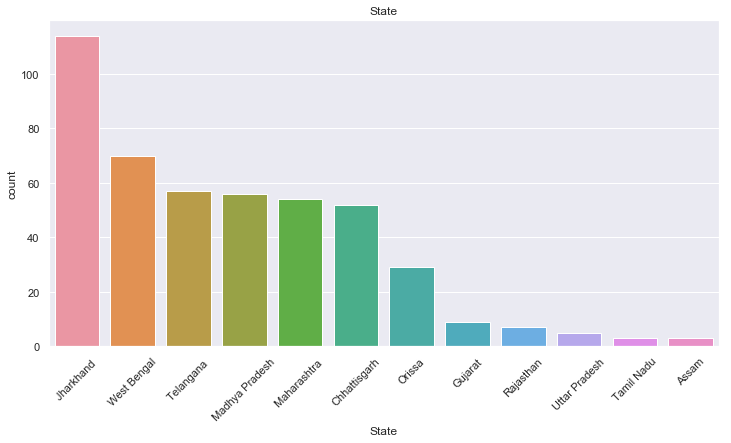

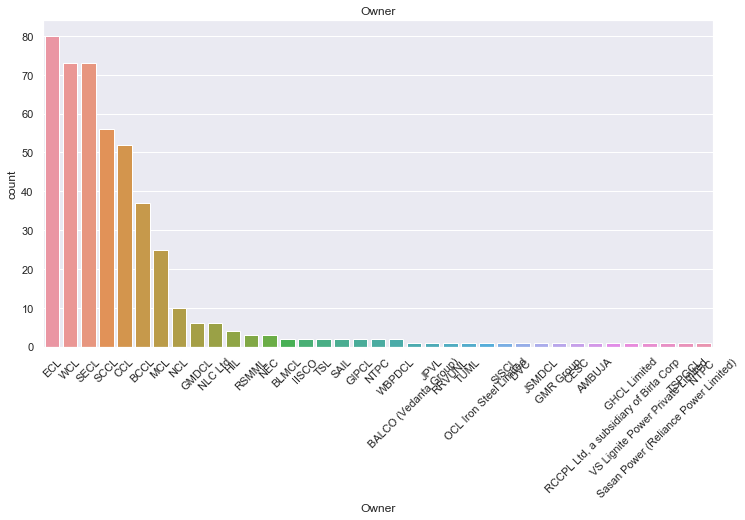

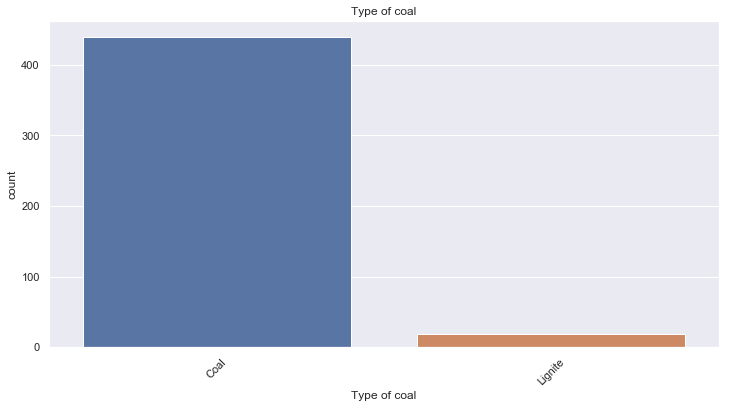

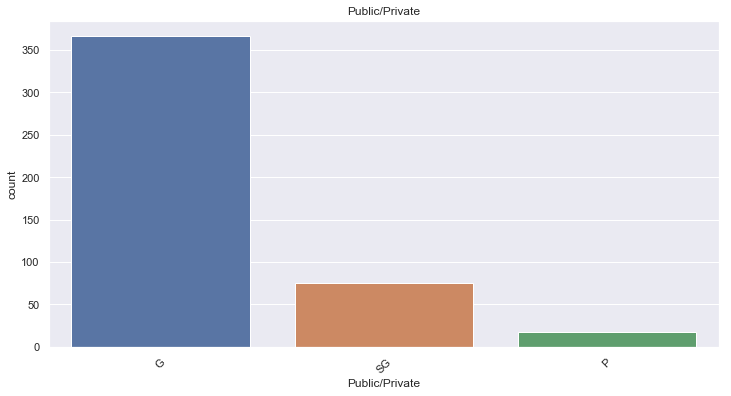

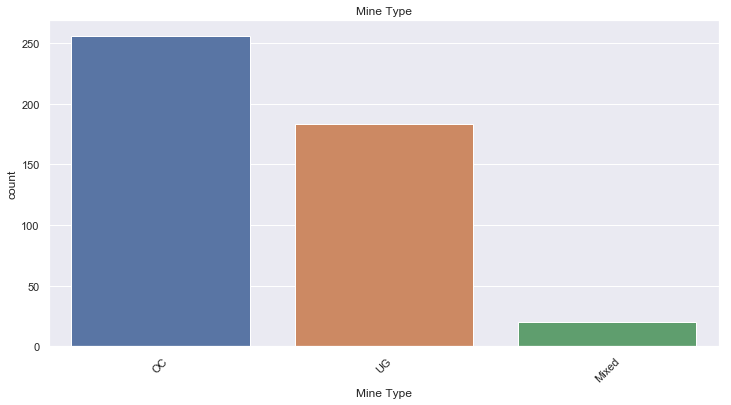

In [106]:
for i, col in enumerate(df[['State','Owner', 'Type of coal','Public/Private', 'Mine Type']]):
    plt.figure(i)
    sns.countplot(x=df[col], data=df, order=df[col].value_counts().index).set_title(f'{col}')
    plt.xticks(rotation=45)

In [107]:
# Which mine has highest production capacity
df.loc[df['Production']==df['Production'].max()]

,State,District Name,Mine,Production,Owner,Type of coal,Public/Private,Mine Type,Latitude,Longitude
311,Chhattisgarh,Korba,GEVRA OC,45.0,SECL,Coal,G,OC,22.3308,82.5958


- Although Jharkhand has maximum number of coal mines but chattisgarh and orissa are ahead in production capacity 

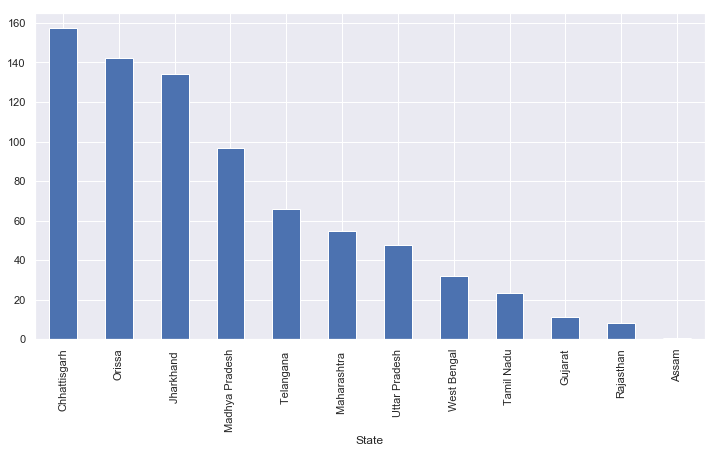

In [108]:
df.groupby(['State'])['Production'].sum().sort_values(ascending=False).plot(kind='bar')

- We are going to plot all the power plant on indian map using folium

In [109]:
locations = df[['Latitude ', 'Longitude ']]
locationlist = locations.values.tolist()

In [110]:
map = folium.Map(location=[22.3308, 82.5958], zoom_start=5)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df['Mine'][point]).add_to(map)
map

- We are going to color mine according to its type

In [111]:
def typecolors(df):
    if df['Mine Type'] == 'OC':
        return 'green'
    elif df['Mine Type'] == 'UG':
        return 'blue'
    else:
        return 'red'
df["Color"] = df.apply(typecolors, axis=1)

In [112]:
map = folium.Map(location=[22.3308, 82.5958], zoom_start=5)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df['Mine'][point],
                 icon=folium.Icon(color=df["Color"][point])).add_to(map)
map